In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

In [3]:

def train_test_split_credit_fraud(df):
    X = df.drop(columns=['Time','Class'])
    y = df['Class']
    return train_test_split(X, y, random_state=1)

In [4]:
df=pd.read_csv("./data/creditcard.csv")

In [5]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
X_train, X_test, y_train, y_test = train_test_split_credit_fraud(df)
X_train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,...,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000
mean,-0.002918,0.001007,-0.000776,-0.000657,0.003623,-0.000413,0.003383,-0.000037,-0.003201,-0.000039,...,-0.000506,-0.000317,-0.000737,0.000243,0.000740,-0.000020,-0.000703,-0.000241,0.000770,88.235355
std,1.961579,1.650818,1.521234,1.416369,1.382186,1.333959,1.243499,1.199284,1.099904,1.094266,...,0.772405,0.736680,0.725948,0.612030,0.606485,0.521657,0.482197,0.406114,0.337554,249.490166
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.320155,-24.588262,...,-54.497720,-34.830382,-9.499423,-44.807735,-2.824849,-10.295397,-2.604551,-22.565679,-15.430084,0.000000
25%,-0.921714,-0.595751,-0.890062,-0.849442,-0.687217,-0.768676,-0.551287,-0.209168,-0.647233,-0.535402,...,-0.211426,-0.228587,-0.542743,-0.161767,-0.354146,-0.316986,-0.327458,-0.070758,-0.052931,5.510000
50%,0.011417,0.066880,0.180284,-0.020854,-0.049806,-0.275498,0.042988,0.021617,-0.053786,-0.093749,...,-0.062265,-0.029590,0.005457,-0.011396,0.041572,0.016702,-0.052650,0.001393,0.011388,22.000000
75%,1.314504,0.804670,1.026521,0.742483,0.614059,0.397160,0.573937,0.327050,0.593482,0.453303,...,0.132836,0.186350,0.527898,0.147295,0.441354,0.350724,0.239794,0.091404,0.078888,77.000000
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,...,38.117209,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000


In [8]:
def scale_train_test(X_train,X_test):
    scaler=MinMaxScaler()
    X_train_scaled=scaler.fit_transform(X_train.to_numpy())
    X_train_scaled=pd.DataFrame(X_train_scaled, columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])
    X_test_scaled=scaler.transform(X_test.to_numpy())
    X_test_scaled=pd.DataFrame(X_test_scaled, columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])
    return X_train_scaled,X_test_scaled

In [9]:
X_train_scaled,X_test_scaled=scale_train_test(X_train,X_test)

In [10]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=1)
X_undersampled, y_undersampled = rus.fit_resample(X_train_scaled, y_train)
y_undersampled.value_counts()

Class
0    381
1    381
Name: count, dtype: int64

In [11]:
import xgboost as xgb

model_undersampled = xgb.XGBClassifier()
model_undersampled.fit(X_undersampled, y_undersampled)
y_pred_undersampled = model_undersampled.predict(X_test_scaled)

In [12]:
print(f"Classification Report - Undersampled Data")
print(classification_report(y_test, y_pred_undersampled))

Classification Report - Undersampled Data
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71091
           1       0.06      0.87      0.11       111

    accuracy                           0.98     71202
   macro avg       0.53      0.93      0.55     71202
weighted avg       1.00      0.98      0.99     71202



In [13]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_oversampled, y_oversampled = ros.fit_resample(X_train_scaled, y_train)
y_oversampled.value_counts()

Class
0    213224
1    213224
Name: count, dtype: int64

In [14]:
model_oversampled = xgb.XGBClassifier()
model_oversampled.fit(X_oversampled, y_oversampled)
y_pred_oversampled = model_oversampled.predict(X_test_scaled)

In [15]:
print(f"Classification Report - Oversampled Data")
print(classification_report(y_test, y_pred_oversampled))

Classification Report - Oversampled Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71091
           1       0.93      0.78      0.85       111

    accuracy                           1.00     71202
   macro avg       0.96      0.89      0.92     71202
weighted avg       1.00      1.00      1.00     71202



In [16]:
from imblearn.over_sampling import SMOTE
smote_sampler = SMOTE(random_state=1, sampling_strategy='auto')
X_resampled, y_resampled = smote_sampler.fit_resample(X_train_scaled, y_train)
y_resampled.value_counts()

Class
0    213224
1    213224
Name: count, dtype: int64

In [17]:
smote_model = xgb.XGBClassifier()
smote_model.fit(X_resampled, y_resampled)
smote_y_pred = smote_model.predict(X_test_scaled)

In [18]:
print(f"Classification Report - Resampled Data - SMOTE")
print(classification_report(y_test, smote_y_pred))

Classification Report - Resampled Data - SMOTE
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71091
           1       0.75      0.80      0.77       111

    accuracy                           1.00     71202
   macro avg       0.87      0.90      0.89     71202
weighted avg       1.00      1.00      1.00     71202



In [19]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=1)
X_resampled, y_resampled = smote_enn.fit_resample(X_train_scaled, y_train)
y_resampled.value_counts()

Class
1    213224
0    212906
Name: count, dtype: int64

In [20]:
smoteenn_model = xgb.XGBClassifier()
smoteenn_model.fit(X_resampled, y_resampled)
smoteenn_y_pred = smoteenn_model.predict(X_test_scaled)

In [21]:
print(f"Classification Report - Resampled Data - SMOTEENN")
print(classification_report(y_test, smoteenn_y_pred))
print("-------------------------------------------------------------")
print("Balanced Accuracy")
print(balanced_accuracy_score(y_test, smoteenn_y_pred))

Classification Report - Resampled Data - SMOTEENN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71091
           1       0.69      0.81      0.75       111

    accuracy                           1.00     71202
   macro avg       0.85      0.91      0.87     71202
weighted avg       1.00      1.00      1.00     71202

-------------------------------------------------------------
Balanced Accuracy
0.9051240758418883


In [22]:
model = xgb.XGBClassifier(n_estimators=100)
model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [23]:
y_test_pred = model.predict(X_test_scaled)
print(balanced_accuracy_score(y_test, y_test_pred))

0.8783502454220267


In [24]:
models = {'train_score': [], 'test_score': [], 'max_depth': []}

for depth in range(1,10):
    models['max_depth'].append(depth)
    model = xgb.XGBClassifier(n_estimators=100, max_depth=depth)
    model.fit(X_train_scaled, y_train)
    y_test_pred = model.predict(X_test_scaled)
    y_train_pred = model.predict(X_train_scaled)

    models['train_score'].append(balanced_accuracy_score(y_train, y_train_pred))
    models['test_score'].append(balanced_accuracy_score(y_test, y_test_pred))

models_df = pd.DataFrame(models)

<Axes: xlabel='max_depth'>

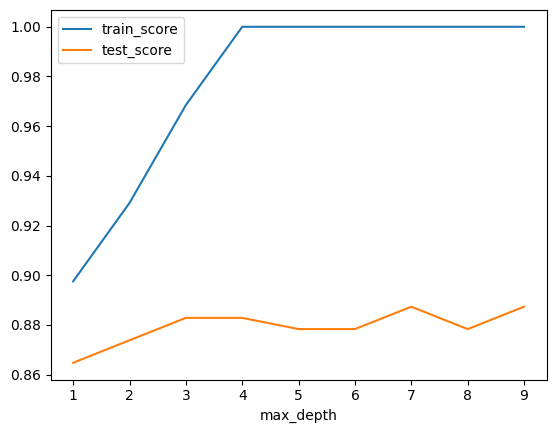

In [25]:
models_df.plot(x='max_depth')

In [26]:
models = {'train_score': [], 'test_score': [], 'n_estimators': []}

for n in [50, 100, 500, 1000]:
    models['n_estimators'].append(n)
    model = xgb.XGBClassifier(n_estimators=n, max_depth=2)
    model.fit(X_train_scaled, y_train)
    y_test_pred = model.predict(X_test_scaled)
    y_train_pred = model.predict(X_train_scaled)

    models['train_score'].append(balanced_accuracy_score(y_train, y_train_pred))
    models['test_score'].append(balanced_accuracy_score(y_test, y_test_pred))

models_df = pd.DataFrame(models)

<Axes: xlabel='n_estimators'>

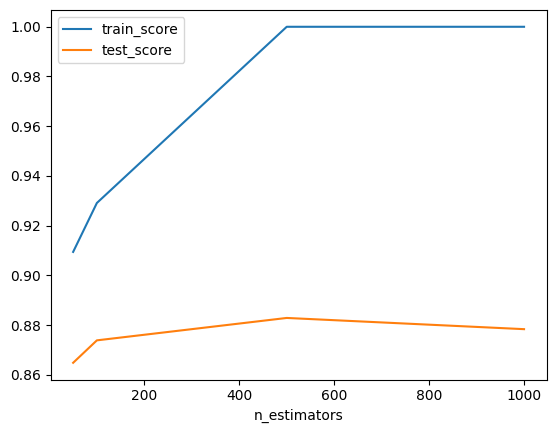

In [27]:
models_df.plot(x='n_estimators')

In [28]:
from sklearn.metrics import classification_report, balanced_accuracy_score

# Training and test scores with balanced accuracy
train_score = balanced_accuracy_score(y_train, model.predict(X_train_scaled))
test_score = balanced_accuracy_score(y_test, y_test_pred)

# Detailed classification report
report = classification_report(y_test, y_test_pred, output_dict=True)

# Extracting the desired metrics
recall_fraudulent = report['1']['recall']
f1_non_fraudulent = report['0']['f1-score']
f1_macro_avg = report['macro avg']['f1-score']

# Printing out the final metrics
print(f"Training Score: {train_score}")
print(f"Test Score: {test_score}")
print(f"Recall for Fraudulent Class: {recall_fraudulent}")
print(f"F1 Score for Non-Fraudulent Class: {f1_non_fraudulent}")
print(f"F1 Macro Average: {f1_macro_avg}")


Training Score: 1.0
Test Score: 0.8783361789438509
Recall for Fraudulent Class: 0.7567567567567568
F1 Score for Non-Fraudulent Class: 0.9997679373852872
F1 Macro Average: 0.9177944164538376
